In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import SGD,Adam

# CSV 파일 읽기
file_path = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/BP_data.csv"
df = pd.read_csv(file_path)

# 데이터프레임 확인
df.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [32]:
# 결측치 확인
print(df.isnull().sum())

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64


In [33]:
columns_to_delete = ['Patient_Number']

# 특정 컬럼만 삭제
df = df.drop(columns=columns_to_delete)

# Genetic_Pedigree_Coefficient: 결측치 2로 대체
df['Genetic_Pedigree_Coefficient'] = df['Genetic_Pedigree_Coefficient'].fillna(2)


# Pregnancy: 
def fill_pregnancy(row):
    if pd.isnull(row['Pregnancy']):
        return 1
    else:
        return 0
df['Pregnancy'] = df.apply(fill_pregnancy, axis=1)


# alcohol_consumption_per_day: 결측치를 0으로 대체
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].fillna(0)

# 변경된 데이터프레임 확인
df.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,23,1,0,0,45961,48071,0.0,2,1,1
1,0,9.75,0.23,54,33,1,1,0,26106,25333,205.0,3,0,0
2,1,10.79,0.91,70,49,0,1,0,9995,29465,67.0,2,1,0
3,0,11.00,0.43,71,50,0,1,0,10635,7439,242.0,1,1,0
4,1,14.17,0.83,52,19,0,1,0,15619,49644,397.0,2,0,0


## 박스 플롯
: 범위를 볼때 사용

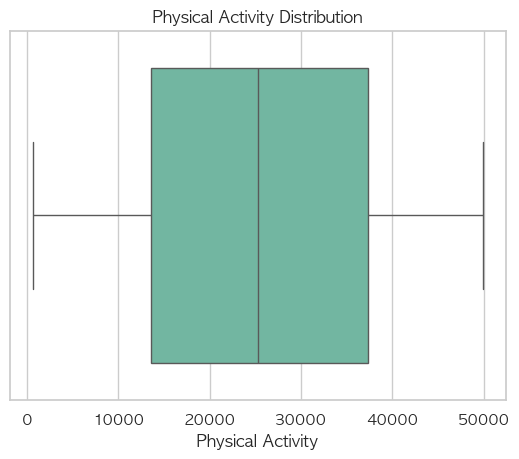

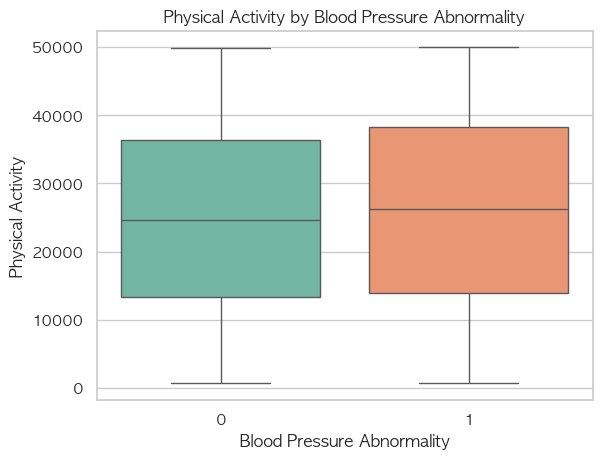

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Physical Activity
sns.boxplot(x=df['Physical_activity'])

plt.title('Physical Activity Distribution')
plt.xlabel('Physical Activity')
plt.show()

# 혈압 이상/정상 그룹별 운동량 차이
sns.boxplot(
    x='Blood_Pressure_Abnormality',
    y='Physical_activity',
    hue='Blood_Pressure_Abnormality',  # x와 동일
    data=df,
    palette='Set2',
    legend=False  # 범례 생략
)

plt.title('Physical Activity by Blood Pressure Abnormality')
plt.xlabel('Blood Pressure Abnormality')
plt.ylabel('Physical Activity')
plt.show()


## CountPlot

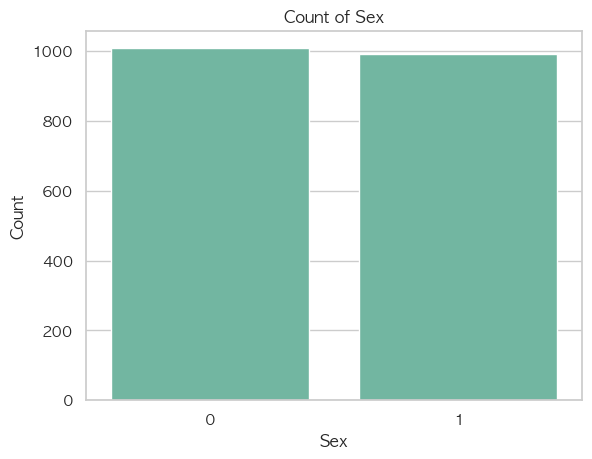

In [35]:
sns.countplot(x='Sex', data=df)

plt.title('Count of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

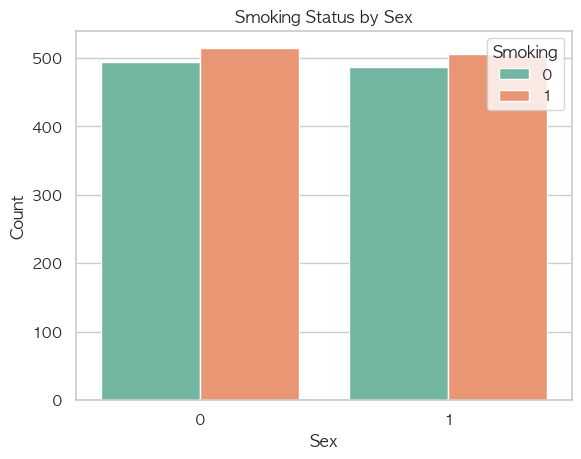

In [36]:
## 성별에 따른 흡연 여부
sns.countplot(x='Sex', hue='Smoking', data=df)

plt.title('Smoking Status by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Smoking')
plt.show()

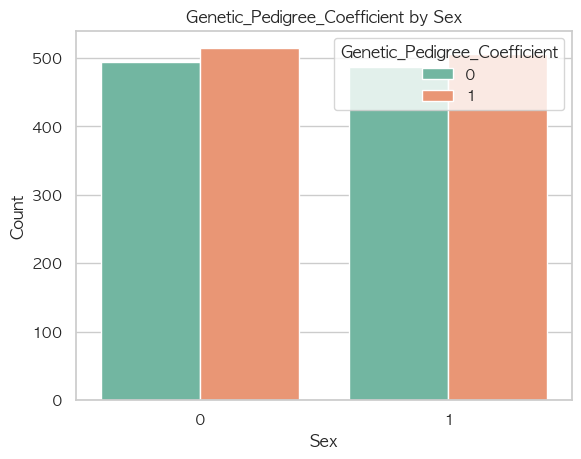

In [37]:
## 성별에 따른 가족력
sns.countplot(x='Sex', hue='Smoking', data=df)

plt.title('Genetic_Pedigree_Coefficient by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Genetic_Pedigree_Coefficient')
plt.show()

In [38]:
# 인코딩할 컬럼 리스트
columns_to_encode = ['Blood_Pressure_Abnormality']  # 'Blood_Pressure_Abnormality' 컬럼을 숫자로 변환

# 특정 컬럼만 인코딩
for column in columns_to_encode:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# 데이터와 타겟 분리
X = df.drop(['Blood_Pressure_Abnormality'],axis=1)
y = df['Blood_Pressure_Abnormality'].values

In [39]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((1600, 13), (400, 13), (1600,), (400,))

In [41]:
import torch

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [44]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader


# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 13]),
 torch.Size([400, 13]),
 torch.Size([1600]),
 torch.Size([400]))

## 모델 정의

In [49]:
import torch.nn as nn

class Blood(nn.Module):
    def __init__(self):
        super(Blood, self).__init__()
        self.fc1 = nn.Linear(13, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = Blood()

## 손실 함수 및 최적화 기법 정의

In [50]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## 모델 학습

In [51]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 0.6673, Accuracy: 66.75%
Epoch 2/20, Loss: 0.5590, Accuracy: 70.50%
Epoch 3/20, Loss: 0.5152, Accuracy: 72.25%
Epoch 4/20, Loss: 0.4959, Accuracy: 74.75%
Epoch 5/20, Loss: 0.4776, Accuracy: 74.50%
Epoch 6/20, Loss: 0.4614, Accuracy: 75.50%
Epoch 7/20, Loss: 0.4495, Accuracy: 76.75%
Epoch 8/20, Loss: 0.4342, Accuracy: 78.50%
Epoch 9/20, Loss: 0.4250, Accuracy: 77.75%
Epoch 10/20, Loss: 0.4139, Accuracy: 78.50%
Epoch 11/20, Loss: 0.4037, Accuracy: 79.75%
Epoch 12/20, Loss: 0.3926, Accuracy: 79.00%
Epoch 13/20, Loss: 0.3851, Accuracy: 78.50%
Epoch 14/20, Loss: 0.3753, Accuracy: 80.25%
Epoch 15/20, Loss: 0.3649, Accuracy: 79.50%
Epoch 16/20, Loss: 0.3549, Accuracy: 81.25%
Epoch 17/20, Loss: 0.3429, Accuracy: 82.50%
Epoch 18/20, Loss: 0.3343, Accuracy: 82.00%
Epoch 19/20, Loss: 0.3244, Accuracy: 82.75%
Epoch 20/20, Loss: 0.3123, Accuracy: 83.50%
Training complete.


## 모델 평가

In [52]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[176  32]
 [ 34 158]]
F1 Score: 0.83
Precision: 0.83
Recall: 0.83
Specificity: 0.83


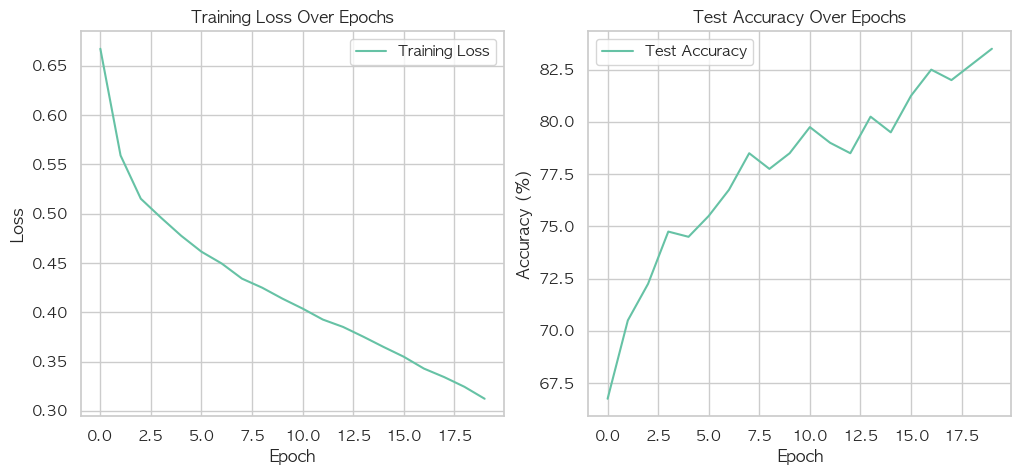

In [53]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()

## Violinplot

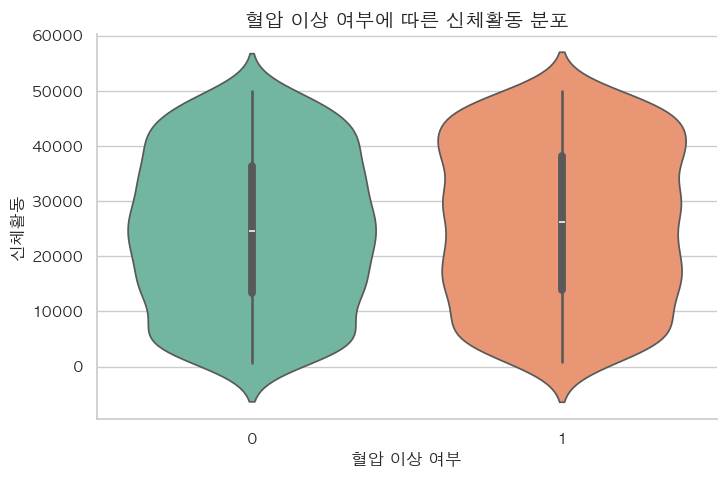

In [54]:
# 스타일 적용
sns.set(style='whitegrid', palette='Set2', font='AppleGothic')  # macOS 한글 대응

# 그래프 크기
plt.figure(figsize=(8, 5))

# Violinplot 그리기
sns.violinplot(
    x='Blood_Pressure_Abnormality',
    y='Physical_activity',
    data=df,
    hue='Blood_Pressure_Abnormality',
    palette='Set2',
    legend=False
)

# 제목 및 축 설정
plt.title('혈압 이상 여부에 따른 신체활동 분포', fontsize=14, fontweight='bold')
plt.xlabel('혈압 이상 여부', fontsize=12)
plt.ylabel('신체활동', fontsize=12)

# 테두리 제거
sns.despine()

# 출력
plt.show()


## heatmap

/Users/jangsohyun/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.draw()
/Users/jangsohyun/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


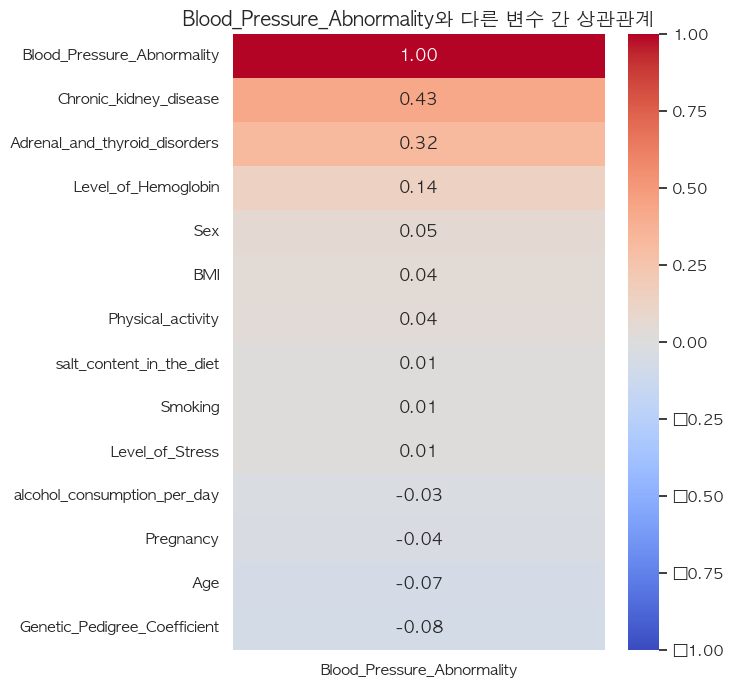

In [55]:
# 1. 수치형 컬럼 간 상관행렬 계산
corr_matrix = df.corr(numeric_only=True)

# 2. 특정 컬럼과의 상관관계만 추출 (여기선 혈압 이상 여부)
target_column = 'Blood_Pressure_Abnormality'
target_corr = corr_matrix[[target_column]].sort_values(by=target_column, ascending=False)

# 3. 히트맵으로 시각화
plt.figure(figsize=(6, 8))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")

plt.title(f'{target_column}와 다른 변수 간 상관관계', fontsize=14)
plt.show()

## histplot

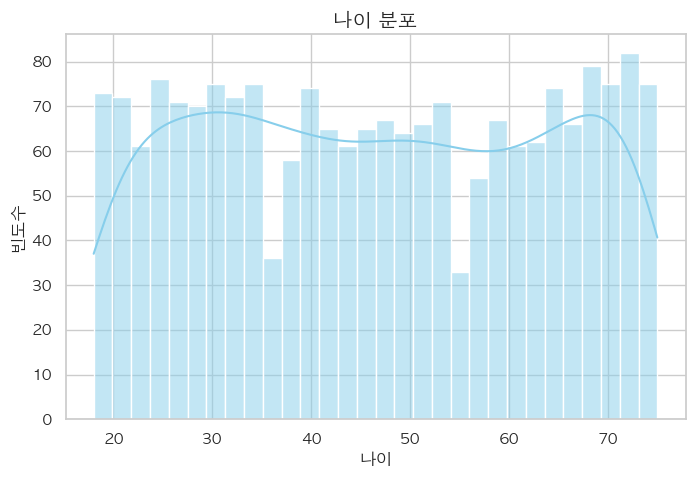

In [56]:
# 나이 분포 시각화
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', kde=True, bins=30, color='skyblue')

plt.title('나이 분포', fontsize=14)
plt.xlabel('나이')
plt.ylabel('빈도수')
plt.show()

## kdeplot

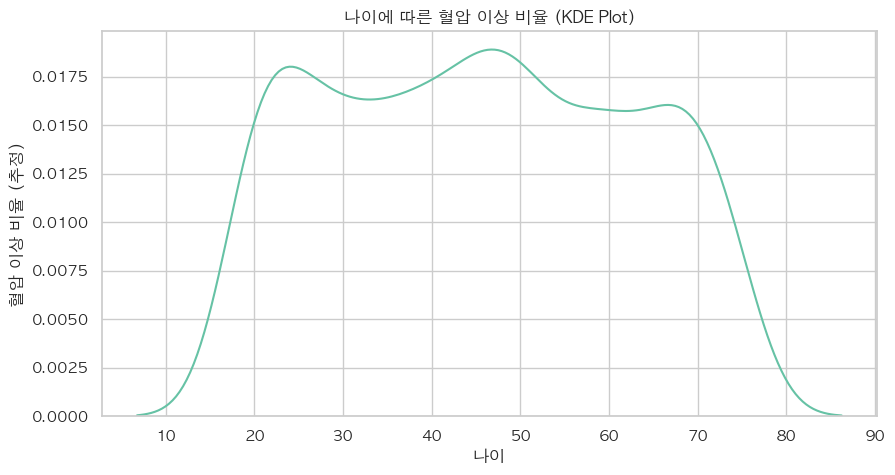

In [57]:
# 나이별 혈압 이상 비율 계산
age_bpa = df.groupby('Age')['Blood_Pressure_Abnormality'].mean().reset_index()

# kdeplot으로 그리기
plt.figure(figsize=(10, 5))
sns.kdeplot(x=age_bpa['Age'], weights=age_bpa['Blood_Pressure_Abnormality'], bw_adjust=0.5)

plt.title('나이에 따른 혈압 이상 비율 (KDE Plot)')
plt.xlabel('나이')
plt.ylabel('혈압 이상 비율 (추정)')
plt.show()

## displot

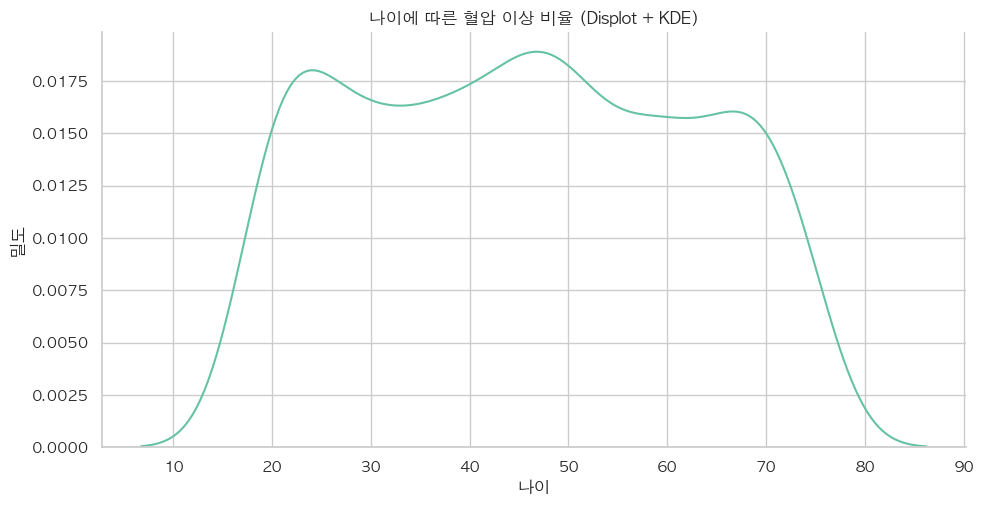

In [58]:
# 나이별 혈압 이상 비율 계산
age_bpa = df.groupby('Age')['Blood_Pressure_Abnormality'].mean().reset_index()

# displot으로 그리기 (히스토그램 + 커널 밀도 추가)
sns.displot(
    x=age_bpa['Age'],
    weights=age_bpa['Blood_Pressure_Abnormality'],
    kind='kde',  # 히스토그램 말고 밀도 곡선
    bw_adjust=0.5,
    height=5,
    aspect=2
)

plt.title('나이에 따른 혈압 이상 비율 (Displot + KDE)')
plt.xlabel('나이')
plt.ylabel('밀도')
plt.show()

## 직선 그래프(lineplot)

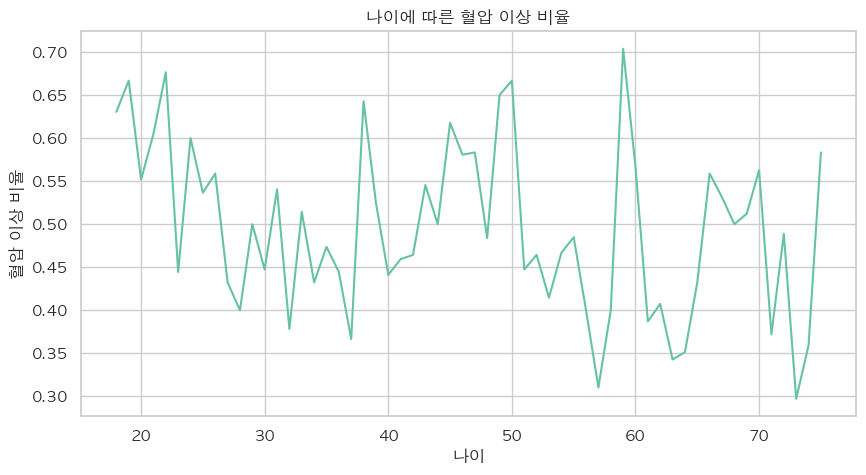

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# 나이별 혈압 이상 비율 계산 (0:정상, 1:이상 → 평균 = 이상 비율)
age_bpa = df.groupby('Age')['Blood_Pressure_Abnormality'].mean().reset_index()

# 선 그래프 시각화
plt.figure(figsize=(10, 5))
sns.lineplot(x='Age', y='Blood_Pressure_Abnormality', data=age_bpa)

plt.title('나이에 따른 혈압 이상 비율')
plt.xlabel('나이')
plt.ylabel('혈압 이상 비율')
plt.show()

## scatter

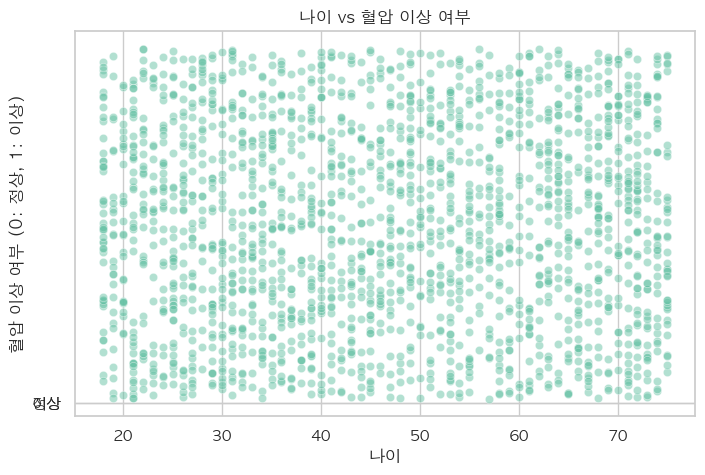

In [60]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Physical_activity', data=df, alpha=0.5)

plt.title('나이 vs 혈압 이상 여부')
plt.xlabel('나이')
plt.ylabel('혈압 이상 여부 (0: 정상, 1: 이상)')
plt.yticks([0, 1], ['정상', '이상'])
plt.grid(True)
plt.show()